In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
df = pd.read_csv("Datos_aire/SISAIRE-CO-2020.csv", parse_dates=["Fecha inicial","Fecha final"])
df.head()

,Estacion,Fecha inicial,Fecha final,CO
0,"""USME""",2020-12-31 22:00:00,2020-12-31 22:59:00,1259.39
1,"""USME""",2020-12-31 21:00:00,2020-12-31 21:59:00,801.43
2,"""USME""",2020-12-31 20:00:00,2020-12-31 20:59:00,1144.90
3,"""USME""",2020-12-31 19:00:00,2020-12-31 19:59:00,686.94
4,"""USME""",2020-12-31 18:00:00,2020-12-31 18:59:00,1488.37


In [8]:
df_new = pd.read_csv("Datos_aire/SISAIRE/SISAIRE-CO-2020-NEW.csv", parse_dates=["Fecha inicial","Fecha final"])
df_new.value_counts(["Estacion"]).sort_index()

Estacion                  
"USME"                        2476
BOLIVIA                       1656
BOSA                          1782
CARVAJAL - SEVILLANA          8122
CENTRO DE ALTO RENDIMIENTO    8729
CIUDAD BOLÍVAR                1806
EL JAZMÍN                     2189
KENNEDY                       8348
LAS FERIAS                    8666
MINAMBIENTE                   1894
MÓVIL 7MA                     5915
PUENTE ARANDA                 6820
P_CAMI - FONTIBÓN             3974
SUBA                          1775
TUNAL                         7945
USAQUEN                       8514
Name: count, dtype: int64

In [6]:
df.value_counts(["Estacion"]).sort_index()

Estacion                  
"USME"                        2476
BOLIVIA                       1656
BOSA                          1782
CARVAJAL - SEVILLANA          8122
CENTRO DE ALTO RENDIMIENTO    8729
CIUDAD BOLÍVAR                1806
EL JAZMÍN                     2189
KENNEDY                       8348
LAS FERIAS                    8666
MINAMBIENTE                   1894
MÓVIL 7MA                     5915
PUENTE ARANDA                 6820
P_CAMI - FONTIBÓN             3974
SUBA                          1775
TUNAL                         7945
USAQUEN                       8514
Name: count, dtype: int64

In [3]:
folder_path = 'c:\\Users\\aleja\\OneDrive\\Documentos\\2025-2\\Inteligencia de Negocios\\Proyecto 2 - Repo\\Proyecto2BI\\Datos_aire\\SISAIRE'
years = [2020,2021,2022,2023]
contaminantes = ["CO", "NO2", "O3", "PM10", "PM25", "SO2"]

for year in years:
    print("Procesando año {year}...")
    dfs_to_merge = []
    
    for contaminante in contaminantes:
        file_path = os.path.join(folder_path, f'SISAIRE-{contaminante}-{year}.csv')
        
        try:
            df= pd.read_csv(file_path)
            key_columns = ["Estacion","Fecha inicial","Fecha final"]
            key_columns = df.columns[:-1].tolist() 
            value_column = df.columns[-1]        
            df = df.rename(columns={value_column: contaminante})
            df[contaminante] = pd.to_numeric(df[contaminante], errors='coerce')
            dfs_to_merge.append(df)
            
        except FileNotFoundError:
            print(f"  - {contaminante}: No encontrado")
            continue
    
    if dfs_to_merge:
        combined = dfs_to_merge[0]
        for df in dfs_to_merge[1:]:
            merge_columns = [col for col in combined.columns if col not in contaminantes]
            combined = pd.merge(combined, df, on=merge_columns, how='outer')
        
        # Guardar
        output_path = os.path.join(folder_path, f'SISAIRE-COMBINED-{year}.csv')
        combined.to_csv(output_path, index=False)
        print(f"✓ Guardado: {output_path}")
        print(f"  Shape: {combined.shape}")
        print(f"  Columnas: {combined.columns.tolist()}")

print("\n¡Completado!")

Procesando año {year}...
✓ Guardado: c:\Users\aleja\OneDrive\Documentos\2025-2\Inteligencia de Negocios\Proyecto 2 - Repo\Proyecto2BI\Datos_aire\SISAIRE\SISAIRE-COMBINED-2020.csv
  Shape: (154198, 9)
  Columnas: ['Estacion', 'Fecha inicial', 'Fecha final', 'CO', 'NO2', 'O3', 'PM10', 'PM25', 'SO2']
Procesando año {year}...
✓ Guardado: c:\Users\aleja\OneDrive\Documentos\2025-2\Inteligencia de Negocios\Proyecto 2 - Repo\Proyecto2BI\Datos_aire\SISAIRE\SISAIRE-COMBINED-2021.csv
  Shape: (178882, 9)
  Columnas: ['Estacion', 'Fecha inicial', 'Fecha final', 'CO', 'NO2', 'O3', 'PM10', 'PM25', 'SO2']
Procesando año {year}...
✓ Guardado: c:\Users\aleja\OneDrive\Documentos\2025-2\Inteligencia de Negocios\Proyecto 2 - Repo\Proyecto2BI\Datos_aire\SISAIRE\SISAIRE-COMBINED-2022.csv
  Shape: (164558, 9)
  Columnas: ['Estacion', 'Fecha inicial', 'Fecha final', 'CO', 'NO2', 'O3', 'PM10', 'PM25', 'SO2']
Procesando año {year}...
✓ Guardado: c:\Users\aleja\OneDrive\Documentos\2025-2\Inteligencia de Negocios

In [28]:
df_year = pd.read_csv("Datos_aire/SISAIRE/SISAIRE-COMBINED-2023.csv", parse_dates=["Fecha inicial","Fecha final"])
df_year.head()

,Estacion,Fecha inicial,Fecha final,CO,NO2,O3,PM10,PM25,SO2
0,"""USME""",2023-12-31 22:00:00,2023-12-31 22:59:00,801.43,29.710,11.772,64.7,38.9,2.619
1,"""USME""",2023-12-31 21:00:00,2023-12-31 21:59:00,1144.90,42.309,6.671,80.9,31.6,3.142
2,"""USME""",2023-12-31 20:00:00,2023-12-31 20:59:00,1946.33,52.087,5.101,81.5,32.7,6.546
3,"""USME""",2023-12-31 19:00:00,2023-12-31 19:59:00,1717.35,56.600,5.101,32.9,15.3,7.856
4,"""USME""",2023-12-31 18:00:00,2023-12-31 18:59:00,1488.37,53.027,10.006,40.8,9.6,3.666


In [29]:
df = df_year.drop(['Fecha final'], axis=1)
df["year"] = df["Fecha inicial"].dt.year
df["Estacion"] = df["Estacion"].str.replace('"', '', regex=False)
df["Estacion"] = df["Estacion"].str.replace("CENTRO DE ALTO RENDIMIENTO", "CDAR", regex=False)
df.head()

,Estacion,Fecha inicial,CO,NO2,O3,PM10,PM25,SO2,year
0,USME,2023-12-31 22:00:00,801.43,29.710,11.772,64.7,38.9,2.619,2023
1,USME,2023-12-31 21:00:00,1144.90,42.309,6.671,80.9,31.6,3.142,2023
2,USME,2023-12-31 20:00:00,1946.33,52.087,5.101,81.5,32.7,6.546,2023
3,USME,2023-12-31 19:00:00,1717.35,56.600,5.101,32.9,15.3,7.856,2023
4,USME,2023-12-31 18:00:00,1488.37,53.027,10.006,40.8,9.6,3.666,2023


In [30]:
df.value_counts(["Estacion"]).sort_index()

Estacion               
BOGOTA RURAL - MOCHUELO    8492
BOLIVIA                    7195
CARVAJAL - SEVILLANA       3530
CDAR                       8720
CIUDAD BOLÍVAR             8720
COLINA                     8602
EL JAZMÍN                  8658
GUAYMARAL                  8585
KENNEDY                    8651
LAS FERIAS                 8652
MINAMBIENTE                8737
MOCHUELO - COLEGIO         3561
MÓVIL 7MA                  3747
MÓVIL FONTIBÓN             9296
PUENTE ARANDA              8711
P_CAMI - FONTIBÓN          8737
SAN CRISTOBAL              8735
SUBA                       8744
TUNAL                      8736
USAQUEN                    8738
USME                       8596
Name: count, dtype: int64

In [31]:
localidades = {
    'BOGOTA RURAL - MOCHUELO':'FONTIBÓN',
    'BOLIVIA': 'ENGATIVÁ',
    'BOSA':'BOSA',
    'CARVAJAL - SEVILLANA': 'KENNEDY',
    'CDAR':'BARRIOS UNIDOS',
    'CIUDAD BOLÍVAR': 'CIUDAD BOLIVAR',
    'COLINA':"SUBA",
    'FONTIBON': 'FONTIBÓN',
    'GUAYMARAL': 'SUBA',
    'EL JAZMÍN': 'PUENTE ARANDA',
    'KENNEDY': 'KENNEDY',
    'LAS FERIAS': 'ENGATIVÁ',
    'MINAMBIENTE':'SANTA FE',
    'MOCHUELO - COLEGIO':'CIUDAD BOLIVAR',
    'MÓVIL 7MA': 'CHAPINERO',
    'MÓVIL FONTIBÓN':'FONTIBÓN',
    'P_CAMI - FONTIBÓN':'FONTIBÓN',
    'PUENTE ARANDA': 'PUENTE ARANDA',
    'SAN CRISTOBAL': 'SAN CRISTOBAL',
    'SUBA': 'SUBA',
    'TUNAL': 'TUNJELITO',
    'USAQUEN': 'USAQUEN', 
    'USME': 'USME'
}

df['Localidad'] = df['Estacion'].map(localidades)
df.head()

,Estacion,Fecha inicial,CO,NO2,O3,PM10,PM25,SO2,year,Localidad
0,USME,2023-12-31 22:00:00,801.43,29.710,11.772,64.7,38.9,2.619,2023,USME
1,USME,2023-12-31 21:00:00,1144.90,42.309,6.671,80.9,31.6,3.142,2023,USME
2,USME,2023-12-31 20:00:00,1946.33,52.087,5.101,81.5,32.7,6.546,2023,USME
3,USME,2023-12-31 19:00:00,1717.35,56.600,5.101,32.9,15.3,7.856,2023,USME
4,USME,2023-12-31 18:00:00,1488.37,53.027,10.006,40.8,9.6,3.666,2023,USME


In [32]:
print("Estaciones sin localidad:")
print(df[df['Localidad'].isna()]['Estacion'].unique())
df['Localidad'].value_counts().sort_index()

Estaciones sin localidad:
[]


Localidad
BARRIOS UNIDOS     8720
CHAPINERO          3747
CIUDAD BOLIVAR    12281
ENGATIVÁ          15847
FONTIBÓN          26525
KENNEDY           12181
PUENTE ARANDA     17369
SAN CRISTOBAL      8735
SANTA FE           8737
SUBA              25931
TUNJELITO          8736
USAQUEN            8738
USME               8596
Name: count, dtype: int64

In [33]:
df.columns = ['Estacion', 'Fecha', 'CO', 'NO2','O3','PM10','PM25', 'SO2', 'Año', 'Localidad']

In [34]:

df = df.reindex(['Estacion', 'Localidad', 'Fecha','Año','CO', 'NO2','O3','PM10','PM25', 'SO2'], axis=1)
df.head()

,Estacion,Localidad,Fecha,Año,CO,NO2,O3,PM10,PM25,SO2
0,USME,USME,2023-12-31 22:00:00,2023,801.43,29.710,11.772,64.7,38.9,2.619
1,USME,USME,2023-12-31 21:00:00,2023,1144.90,42.309,6.671,80.9,31.6,3.142
2,USME,USME,2023-12-31 20:00:00,2023,1946.33,52.087,5.101,81.5,32.7,6.546
3,USME,USME,2023-12-31 19:00:00,2023,1717.35,56.600,5.101,32.9,15.3,7.856
4,USME,USME,2023-12-31 18:00:00,2023,1488.37,53.027,10.006,40.8,9.6,3.666


In [35]:
output_path = os.path.join(folder_path, f'SISAIRE-MODIFIED-2023.csv')
df.to_csv(output_path, index=False)

In [90]:
df_2020 = pd.read_csv("Datos_aire/SISAIRE/SISAIRE-MODIFIED-2020.csv")
df_2021 = pd.read_csv("Datos_aire/SISAIRE/SISAIRE-MODIFIED-2021.csv")
df_2022 = pd.read_csv("Datos_aire/SISAIRE/SISAIRE-MODIFIED-2022.csv")
df_2023 = pd.read_csv("Datos_aire/SISAIRE/SISAIRE-MODIFIED-2023.csv")

df_total = pd.concat([df_2020,df_2021,df_2022,df_2023])
output_path = os.path.join(folder_path, f'SISAIRE-MODIFIED-COMPLETE.csv')
df_total.to_csv(output_path, index=False)

In [91]:
df = df_total
print("Información general del dataset")
print(f"   - Filas: {df.shape[0]:,}")
print(f"   - Columnas: {df.shape[1]}")
df.info


Información general del dataset
   - Filas: 663,781
   - Columnas: 10


<bound method DataFrame.info of                        Estacion Localidad                Fecha   Año       CO  \
0                          USME      USME  2020-12-31 22:00:00  2020  1259.39   
1                          USME      USME  2020-12-31 21:00:00  2020   801.43   
2                          USME      USME  2020-12-31 20:00:00  2020  1144.90   
3                          USME      USME  2020-12-31 19:00:00  2020   686.94   
4                          USME      USME  2020-12-31 18:00:00  2020  1488.37   
...                         ...       ...                  ...   ...      ...   
166138  BOGOTA RURAL - MOCHUELO  FONTIBÓN  2023-01-01 04:00:00  2023      NaN   
166139  BOGOTA RURAL - MOCHUELO  FONTIBÓN  2023-01-01 03:00:00  2023      NaN   
166140  BOGOTA RURAL - MOCHUELO  FONTIBÓN  2023-01-01 02:00:00  2023      NaN   
166141  BOGOTA RURAL - MOCHUELO  FONTIBÓN  2023-01-01 01:00:00  2023      NaN   
166142                   COLINA      SUBA  2023-06-23 10:00:00  2023      NaN

In [92]:
print("\n" + "="*60)
print("VALORES FALTANTES")
print("="*60)
missing = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Columna': missing.index,
    'Valores Faltantes': missing.values,
    'Porcentaje (%)': missing_percent.values
})
print(missing_df)



VALORES FALTANTES
     Columna  Valores Faltantes  Porcentaje (%)
0   Estacion                  0        0.000000
1  Localidad                  0        0.000000
2      Fecha                  0        0.000000
3        Año                  0        0.000000
4         CO             121566       18.314173
5        NO2             112245       16.909945
6         O3             134414       20.249751
7       PM10              61741        9.301411
8       PM25              55339        8.336936
9        SO2             241533       36.387453


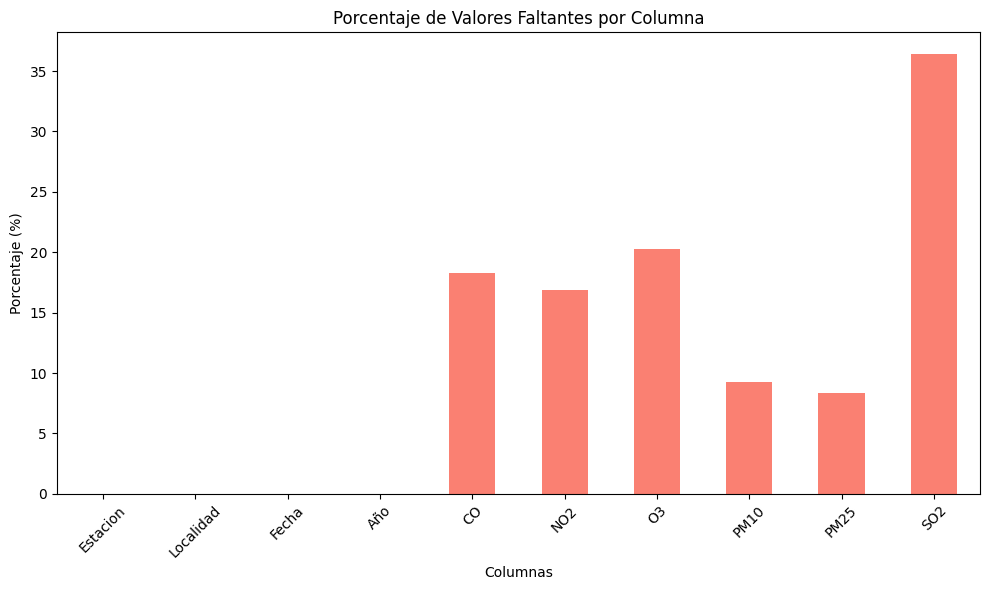

In [93]:
plt.figure(figsize=(10, 6))
missing_percent.plot(kind='bar', color='salmon')
plt.title('Porcentaje de Valores Faltantes por Columna')
plt.xlabel('Columnas')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [94]:
print("\n" + "="*60)
print("ESTADÍSTICAS DESCRIPTIVAS - CONTAMINANTES")
print("="*60)

contaminantes = ['CO', 'NO2', 'O3', 'PM10', 'PM25', 'SO2']
print(df[contaminantes].describe())



ESTADÍSTICAS DESCRIPTIVAS - CONTAMINANTES
                  CO            NO2             O3           PM10  \
count  542215.000000  551536.000000  529367.000000  602040.000000   
mean      735.154828      29.540639      23.461905      32.461736   
std       571.063411      17.935333      21.023402      22.538972   
min         0.000000       0.000000       0.000000       0.000000   
25%       343.470000      15.338000       5.886000      16.700000   
50%       572.450000      27.302000      18.443000      27.300000   
75%       915.920000      40.508250      35.512200      42.300000   
max     13738.800000     244.263960     208.649000     398.510000   

                PM25            SO2  
count  608442.000000  422248.000000  
mean       16.705572       5.402371  
std        12.401802       7.536813  
min         0.000000       0.000000  
25%         7.000000       1.833020  
50%        14.000000       3.142320  
75%        23.000000       6.041000  
max       202.000000     515.86

In [95]:
print("\n" + "="*60)
print("VALORES ÚNICOS")
print("="*60)

print(f"\nEstaciones únicas: {df['Estacion'].nunique()}")
print(sorted(df['Estacion'].unique()))

print(f"\nLocalidades únicas: {df['Localidad'].nunique()}")
print(sorted(df['Localidad'].unique()))

print(f"\nAños únicos: {df['Año'].nunique()}")
print(sorted(df['Año'].unique()))


VALORES ÚNICOS

Estaciones únicas: 22
['BOGOTA RURAL - MOCHUELO', 'BOLIVIA', 'BOSA', 'CARVAJAL - SEVILLANA', 'CDAR', 'CIUDAD BOLÍVAR', 'COLINA', 'EL JAZMÍN', 'GUAYMARAL', 'KENNEDY', 'LAS FERIAS', 'MINAMBIENTE', 'MOCHUELO - COLEGIO', 'MÓVIL 7MA', 'MÓVIL FONTIBÓN', 'PUENTE ARANDA', 'P_CAMI - FONTIBÓN', 'SAN CRISTOBAL', 'SUBA', 'TUNAL', 'USAQUEN', 'USME']

Localidades únicas: 14
['BARRIOS UNIDOS', 'BOSA', 'CHAPINERO', 'CIUDAD BOLIVAR', 'ENGATIVÁ', 'FONTIBÓN', 'KENNEDY', 'PUENTE ARANDA', 'SAN CRISTOBAL', 'SANTA FE', 'SUBA', 'TUNJELITO', 'USAQUEN', 'USME']

Años únicos: 4
[2020, 2021, 2022, 2023]


In [96]:
print("\n" + "="*60)
print("DISTRIBUCIÓN DE DATOS")
print("="*60)

# Conteo por estación
print(f"\n📊 Registros por Estación:")
print(df['Estacion'].value_counts().sort_index())

# Conteo por localidad
print(f"\n🏙️ Registros por Localidad:")
print(df['Localidad'].value_counts().sort_index())

# Conteo por año
print(f"\n📅 Registros por Año:")
print(df['Año'].value_counts().sort_index())


DISTRIBUCIÓN DE DATOS

📊 Registros por Estación:
Estacion
BOGOTA RURAL - MOCHUELO    17251
BOLIVIA                    26299
BOSA                        6837
CARVAJAL - SEVILLANA       24859
CDAR                       59228
CIUDAD BOLÍVAR             27828
COLINA                     24799
EL JAZMÍN                  28104
GUAYMARAL                  42883
KENNEDY                    37457
LAS FERIAS                 38898
MINAMBIENTE                34958
MOCHUELO - COLEGIO          3561
MÓVIL 7MA                  27702
MÓVIL FONTIBÓN             23748
PUENTE ARANDA              34833
P_CAMI - FONTIBÓN          17480
SAN CRISTOBAL              34793
SUBA                       35204
TUNAL                      34865
USAQUEN                    36456
USME                       45738
Name: count, dtype: int64

🏙️ Registros por Localidad:
Localidad
BARRIOS UNIDOS     59228
BOSA                6837
CHAPINERO          27702
CIUDAD BOLIVAR     31389
ENGATIVÁ           65197
FONTIBÓN           58479



GENERANDO VISUALIZACIONES


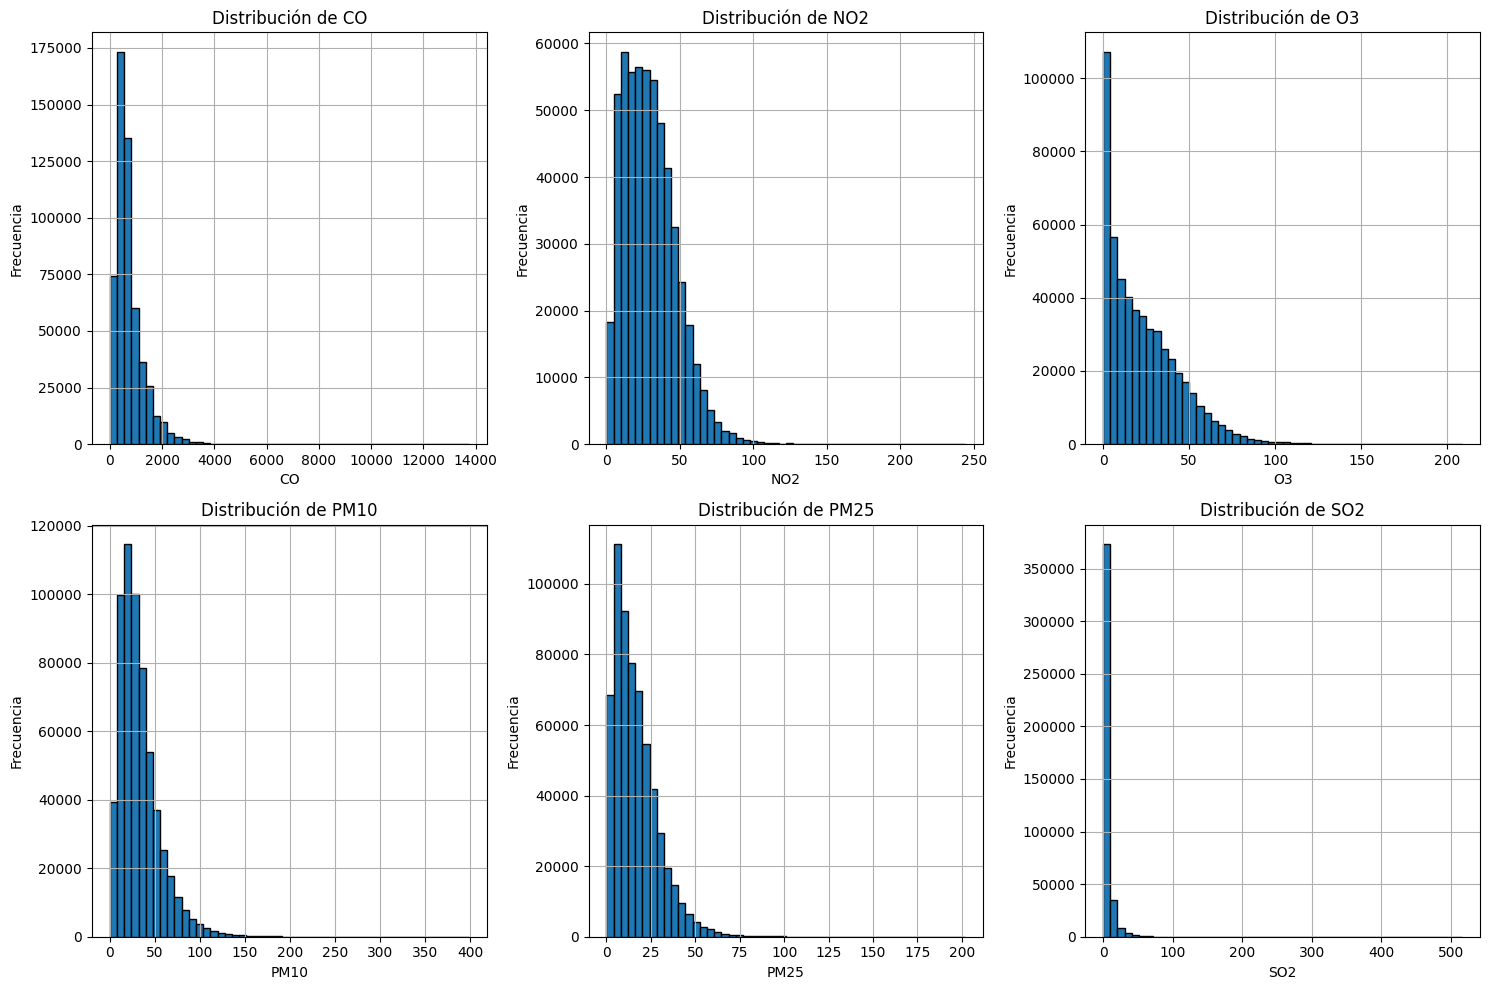

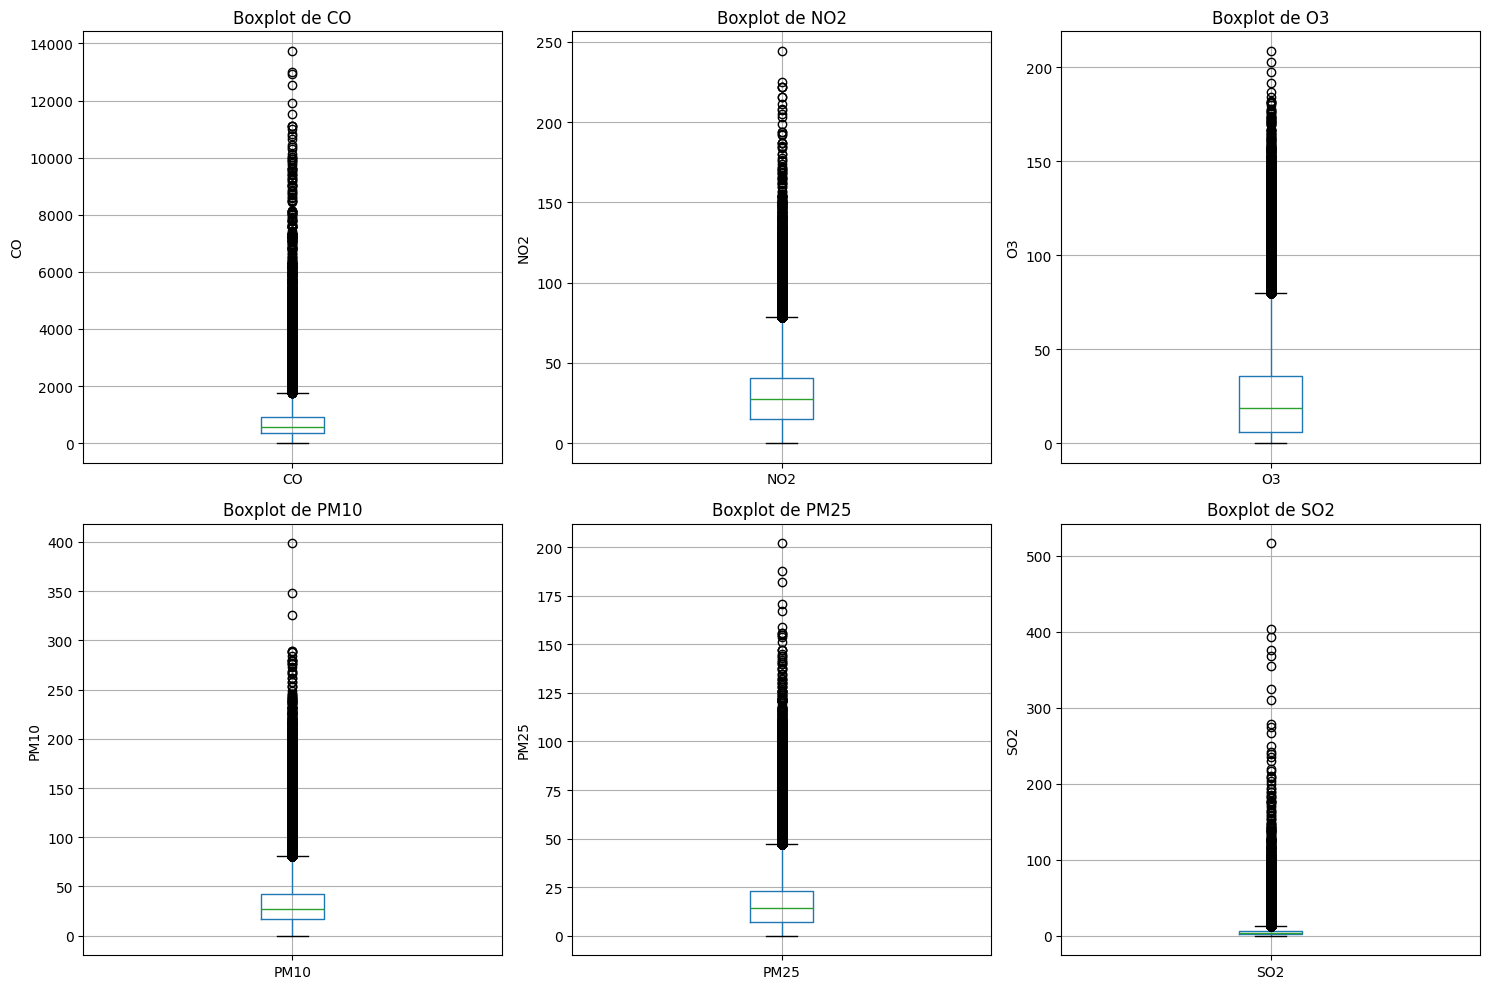

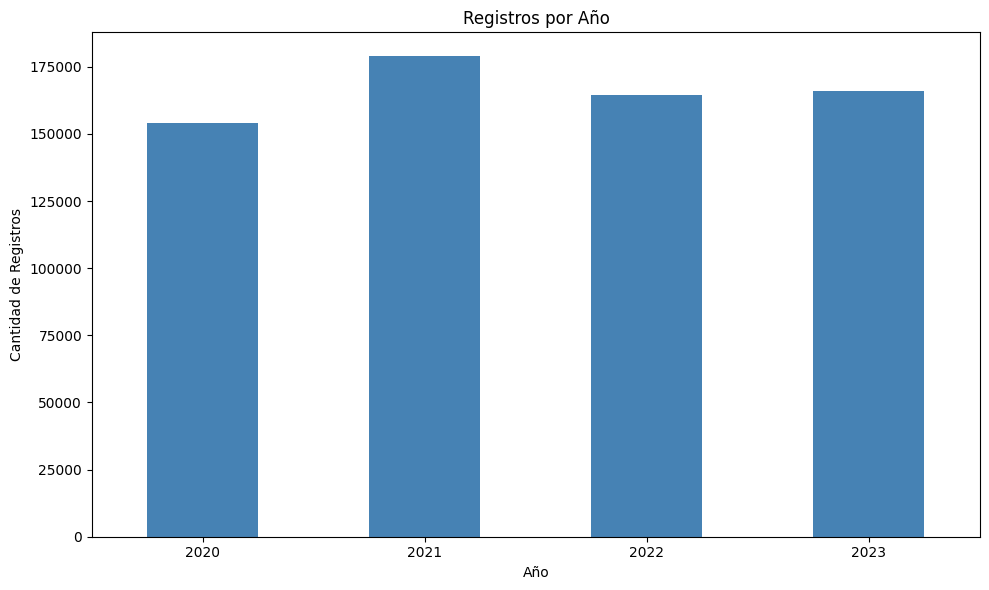

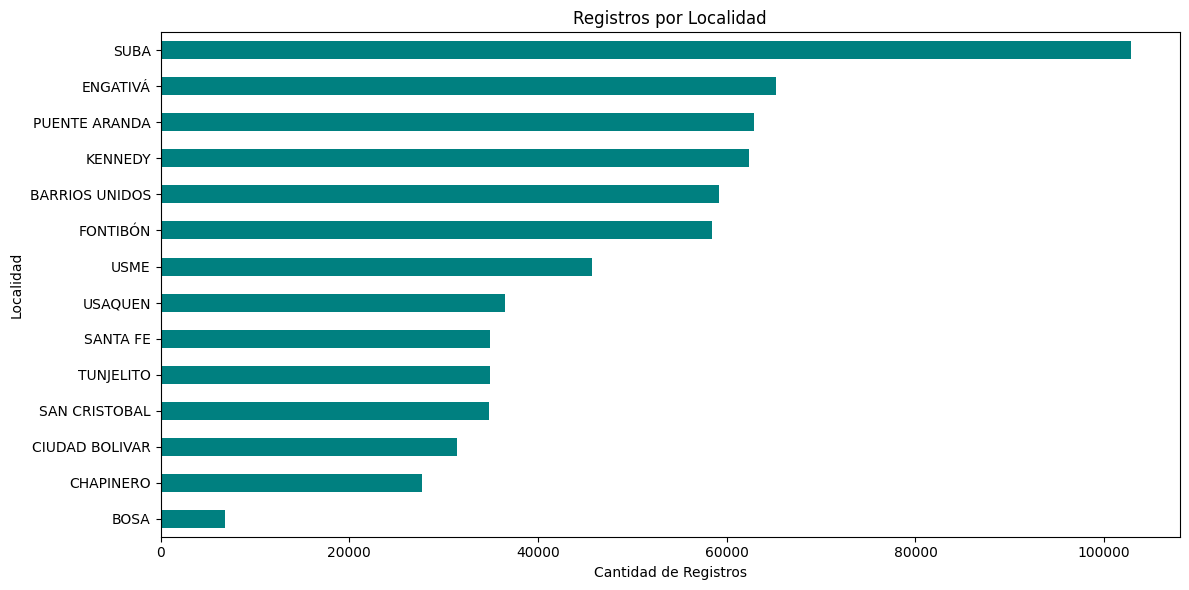

In [97]:
print("\n" + "="*60)
print("GENERANDO VISUALIZACIONES")
print("="*60)

# 1. Distribución de contaminantes
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, contaminante in enumerate(contaminantes):
    df[contaminante].hist(bins=50, ax=axes[idx], edgecolor='black')
    axes[idx].set_title(f'Distribución de {contaminante}')
    axes[idx].set_xlabel(contaminante)
    axes[idx].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# 2. Boxplots de contaminantes
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, contaminante in enumerate(contaminantes):
    df.boxplot(column=contaminante, ax=axes[idx])
    axes[idx].set_title(f'Boxplot de {contaminante}')
    axes[idx].set_ylabel(contaminante)

plt.tight_layout()
plt.show()

# 3. Registros por año
plt.figure(figsize=(10, 6))
df['Año'].value_counts().sort_index().plot(kind='bar', color='steelblue')
plt.title('Registros por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Registros')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 4. Registros por localidad
plt.figure(figsize=(12, 6))
df['Localidad'].value_counts().sort_values().plot(kind='barh', color='teal')
plt.title('Registros por Localidad')
plt.xlabel('Cantidad de Registros')
plt.ylabel('Localidad')
plt.tight_layout()
plt.show()


MATRIZ DE CORRELACIÓN
            CO       NO2        O3      PM10      PM25       SO2
CO    1.000000  0.547674 -0.297346  0.457637  0.473086  0.242344
NO2   0.547674  1.000000 -0.363025  0.429306  0.473613  0.156185
O3   -0.297346 -0.363025  1.000000  0.033190  0.024748 -0.098053
PM10  0.457637  0.429306  0.033190  1.000000  0.781486  0.311351
PM25  0.473086  0.473613  0.024748  0.781486  1.000000  0.279226
SO2   0.242344  0.156185 -0.098053  0.311351  0.279226  1.000000


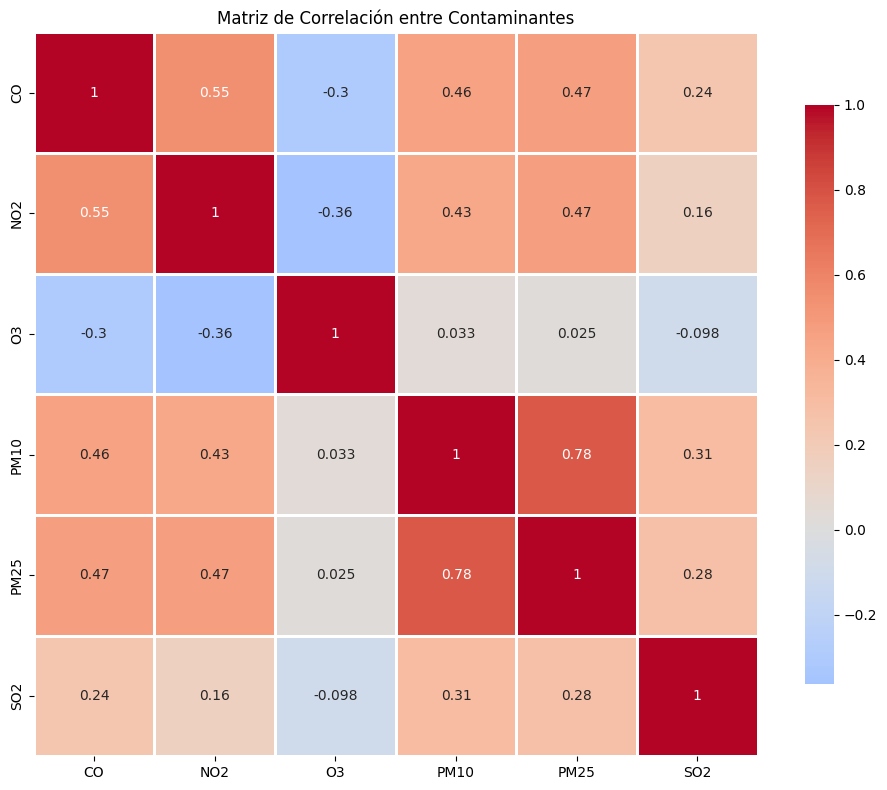

In [98]:
print("\n" + "="*60)
print("MATRIZ DE CORRELACIÓN")
print("="*60)

correlation = df[contaminantes].corr()
print(correlation)

# Visualización de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación entre Contaminantes')
plt.tight_layout()
plt.show()

In [99]:
# ==================== ANÁLISIS PRE-IMPUTACIÓN ====================
print("\n" + "="*60)
print("ANÁLISIS DE ESTACIONES PROBLEMÁTICAS")
print("="*60)

# Identificar estaciones con >80% de valores faltantes en cualquier contaminante
umbral_critico = 80

estaciones_problematicas = []
for estacion in df['Estacion'].unique():
    df_estacion = df[df['Estacion'] == estacion]
    for contaminante in contaminantes:
        pct_faltante = (df_estacion[contaminante].isnull().sum() / len(df_estacion)) * 100
        if pct_faltante > umbral_critico:
            estaciones_problematicas.append({
                'Estacion': estacion,
                'Contaminante': contaminante,
                'Pct_Faltante': pct_faltante,
                'Registros': len(df_estacion)
            })

if estaciones_problematicas:
    df_problemas = pd.DataFrame(estaciones_problematicas)
    print(f"\nEstaciones con >{umbral_critico}% de valores faltantes:")
    print(df_problemas.sort_values('Pct_Faltante', ascending=False))
    
    # Decisión: Eliminar estas combinaciones estación-contaminante
    print(f"\n RECOMENDACIÓN: Eliminar estos registros específicos")

# ==================== LIMPIEZA SELECTIVA ====================
print("\n" + "="*60)
print("LIMPIEZA SELECTIVA DE DATOS")
print("="*60)

# Opción 1: Eliminar estaciones completamente problemáticas
estaciones_eliminar = ['BOGOTA RURAL - MOCHUELO', 'MÓVIL 7MA']  # 100% faltantes en varios contaminantes

print(f"\ Eliminando estaciones problemáticas: {estaciones_eliminar}")
df_limpio = df[~df['Estacion'].isin(estaciones_eliminar)].copy()
print(f"   Registros eliminados: {len(df) - len(df_limpio):,}")
print(f"   Registros restantes: {len(df_limpio):,}")

# Opción 2: Para SO2, considerar eliminar la columna si >30% de estaciones tienen >50% faltantes
so2_problematicas = df.groupby('Estacion')['SO2'].apply(
    lambda x: (x.isnull().sum() / len(x) * 100)
).sort_values(ascending=False)

print(f"\nAnálisis de SO2:")
print(f"   Estaciones con >50% faltantes en SO2: {(so2_problematicas > 50).sum()}/{len(so2_problematicas)}")

if (so2_problematicas > 50).sum() > len(so2_problematicas) * 0.3:
    print(f"\n RECOMENDACIÓN: Considerar eliminar columna SO2 del análisis")
    print(f"   Más del 30% de estaciones tienen datos insuficientes")

# ==================== ELIMINAR FILAS CON MUCHOS NULOS ====================
threshold = 50  # 50% o más de contaminantes faltantes
df_limpio['missing_percent'] = df_limpio[contaminantes].isnull().sum(axis=1) / len(contaminantes) * 100

filas_eliminadas = df_limpio[df_limpio['missing_percent'] >= threshold]
print(f"\n Eliminando {len(filas_eliminadas):,} filas con >{threshold}% de valores nulos")
print(f"   Por estación:")
print(filas_eliminadas.groupby('Estacion').size().sort_values(ascending=False).head(10))

# Guardar filas eliminadas
output_removed = os.path.join('Datos_aire', 'SISAIRE', 'SISAIRE-FILAS-ELIMINADAS.csv')
filas_eliminadas.to_csv(output_removed, index=False)

df_limpio = df_limpio[df_limpio['missing_percent'] < threshold].copy()
df_limpio = df_limpio.drop('missing_percent', axis=1)

print(f"\nDataset después de limpieza:")
print(f"   Total filas: {len(df_limpio):,} ({len(df_limpio)/len(df)*100:.1f}% del original)")

# ==================== IMPUTACIÓN MEJORADA ====================
print("\n" + "="*60)
print("IMPUTACIÓN CON DATASET LIMPIO")
print("="*60)

df_final = df_limpio.copy()
df_final['Hora'] = pd.to_datetime(df_final['Fecha']).dt.hour
df_final['Mes'] = pd.to_datetime(df_final['Fecha']).dt.month
df_final['DiaSemana'] = pd.to_datetime(df_final['Fecha']).dt.dayofweek

# Decidir qué contaminantes imputar
contaminantes_imputar = [c for c in contaminantes if c != 'SO2']  # Excluir SO2 si es muy problemático
print(f"\nContaminantes a imputar: {contaminantes_imputar}")

for contaminante in contaminantes_imputar:
    print(f"\nProcesando {contaminante}...")
    
    pct_faltante = (df_final[contaminante].isnull().sum() / len(df_final)) * 100
    print(f"   Valores faltantes: {df_final[contaminante].isnull().sum():,} ({pct_faltante:.2f}%)")
    
    # Solo imputar si hay menos del 20% de valores faltantes
    if pct_faltante < 20:
        mean_1 = df_final.groupby(['Estacion', 'Año', 'Mes', 'Hora'])[contaminante].transform('mean')
        mean_2 = df_final.groupby(['Estacion', 'Año', 'Hora'])[contaminante].transform('mean')
        mean_3 = df_final.groupby(['Localidad', 'Año', 'Mes'])[contaminante].transform('mean')
        mean_4 = df_final.groupby(['Año'])[contaminante].transform('mean')
        mean_5 = df_final[contaminante].mean()
        
        df_final[contaminante] = df_final[contaminante].fillna(mean_1)
        df_final[contaminante] = df_final[contaminante].fillna(mean_2)
        df_final[contaminante] = df_final[contaminante].fillna(mean_3)
        df_final[contaminante] = df_final[contaminante].fillna(mean_4)
        df_final[contaminante] = df_final[contaminante].fillna(mean_5)
        
        print(f"   ✓ Imputado - NaN restantes: {df_final[contaminante].isnull().sum()}")
    else:
        print(f"ADVERTENCIA: {pct_faltante:.1f}% faltante - Considerar eliminar")

# ==================== VALIDACIÓN FINAL ====================
print("\n" + "="*60)
print("VALIDACIÓN FINAL")
print("="*60)

print("\nComparación estadística:")
for contaminante in contaminantes_imputar:
    if contaminante in df_limpio.columns:
        orig_mean = df_limpio[contaminante].mean()
        orig_std = df_limpio[contaminante].std()
        imp_mean = df_final[contaminante].mean()
        imp_std = df_final[contaminante].std()
        
        cambio_media = abs((imp_mean - orig_mean) / orig_mean * 100)
        
        print(f"\n{contaminante}:")
        print(f"   Original - Media: {orig_mean:.2f}, Std: {orig_std:.2f}")
        print(f"   Imputado - Media: {imp_mean:.2f}, Std: {imp_std:.2f}")
        print(f"   Cambio en media: {cambio_media:.2f}%")
        
        if cambio_media > 5:
            print(f" ADVERTENCIA: Cambio significativo en la media")

# Eliminar columnas auxiliares
df_final = df_final.drop(['Hora', 'Mes', 'DiaSemana'], axis=1)

# Guardar
output_path = os.path.join('Datos_aire', 'SISAIRE', 'SISAIRE-MODIFIED-COMPLETE-IMPUTED.csv')
df_final.to_csv(output_path, index=False)
print(f"\nDataset final guardado en: {output_path}")
print(f"   Filas: {len(df_final):,}")
print(f"   Valores faltantes totales: {df_final[contaminantes_imputar].isnull().sum().sum()}")

<>:38: SyntaxWarning: invalid escape sequence '\ '
<>:38: SyntaxWarning: invalid escape sequence '\ '
C:\Users\aleja\AppData\Local\Temp\ipykernel_31260\2393154945.py:38: SyntaxWarning: invalid escape sequence '\ '
  print(f"\ Eliminando estaciones problemáticas: {estaciones_eliminar}")



ANÁLISIS DE ESTACIONES PROBLEMÁTICAS

Estaciones con >80% de valores faltantes:
                   Estacion Contaminante  Pct_Faltante  Registros
0                LAS FERIAS          SO2    100.000000      38898
2                 MÓVIL 7MA           O3    100.000000      27702
4                 GUAYMARAL          SO2    100.000000      42883
5             SAN CRISTOBAL          SO2    100.000000      34793
6   BOGOTA RURAL - MOCHUELO           CO    100.000000      17251
7   BOGOTA RURAL - MOCHUELO           O3    100.000000      17251
8        MOCHUELO - COLEGIO           CO    100.000000       3561
9        MOCHUELO - COLEGIO          NO2    100.000000       3561
10       MOCHUELO - COLEGIO           O3    100.000000       3561
11       MOCHUELO - COLEGIO          SO2    100.000000       3561
1               MINAMBIENTE          SO2     99.087476      34958
3                 MÓVIL 7MA          SO2     98.404447      27702

 RECOMENDACIÓN: Eliminar estos registros específicos

LIMPIE